In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

In [2]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Display the missing data summary
print("Missing data summary:")
print(missing_data)

Missing data summary:
System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64


  A lot of missing data

In [3]:
# Calculate missing data percentage
missing_data_percentage = (missing_data / 57488) * 100
print(missing_data_percentage)

System Location Code             0.000000
Previous Cycle Plant Type        0.000000
Plant Type                       0.000000
Plant Stage                      0.000000
Temperature Sensor (°C)         15.114459
Humidity Sensor (%)             67.608892
Light Intensity Sensor (lux)     7.441553
CO2 Sensor (ppm)                 0.000000
EC Sensor (dS/m)                 0.000000
O2 Sensor (ppm)                  0.000000
Nutrient N Sensor (ppm)         17.349708
Nutrient P Sensor (ppm)          9.911634
Nutrient K Sensor (ppm)          6.437865
pH Sensor                        0.000000
Water Level Sensor (mm)         15.032702
dtype: float64


either outright deletion of entire column, lose one feature, or sacrifice 67% of the dataset

In [4]:
# Group by 'System Location Code' and count rows per location
location_counts = df.groupby('System Location Code').size()

# Convert the result to a DataFrame (optional)
location_counts_df = location_counts.reset_index(name='Count')

# Display the counts
print(location_counts_df)

  System Location Code  Count
0               Zone_A   8148
1               Zone_B   8296
2               Zone_C   8268
3               Zone_D   8062
4               Zone_E   8272
5               Zone_F   8156
6               Zone_G   8287


System Location Code, this column looks good, no error

In [5]:
# Group by 'System Location Code' and count rows per location
previous_counts = df.groupby('Previous Cycle Plant Type').size()

# Convert the result to a DataFrame (optional)
previous_counts_df = previous_counts.reset_index(name='Count')

# Display the counts
print(previous_counts_df)

  Previous Cycle Plant Type  Count
0       Fruiting Vegetables  14481
1                     Herbs  14257
2              Leafy Greens  14446
3                Vine Crops  14305


Previous Cycle Plant Type, this column looks good, no error

In [3]:
# Loop through each column and print unique values to examine for any error
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: System Location Code
Unique Values: ['Zone_D' 'Zone_G' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_A' 'Zone_E']
Number of Unique Values: 7

Column: Previous Cycle Plant Type
Unique Values: ['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']
Number of Unique Values: 4

Column: Plant Type
Unique Values: ['Vine Crops' 'VINE CROPS' 'herbs' 'fruiting vegetables' 'LEAFY GREENS'
 'FRUITING VEGETABLES' 'Leafy Greens' 'Herbs' 'Fruiting Vegetables'
 'HERBS' 'vine crops' 'leafy greens']
Number of Unique Values: 12

Column: Plant Stage
Unique Values: ['Maturity' 'Vegetative' 'maturity' 'seedling' 'MATURITY' 'Seedling'
 'SEEDLING' 'VEGETATIVE' 'vegetative']
Number of Unique Values: 9

Column: Temperature Sensor (°C)
Unique Values: [ 23.34 -24.16  23.84 ...  19.   -21.6  -23.24]
Number of Unique Values: 1440

Column: Humidity Sensor (%)
Unique Values: [  nan 63.14 62.27 ... 72.27 80.09 59.33]
Number of Unique Values: 2095

Column: Light Intensity Sensor (lux)
Unique Values: [ 454.  441.  562. .

after examining the unique data per column, should do re formatting to achieve consistent data before handling the missing data


In [4]:
print(df.groupby('Plant Stage').size())
#print(df.columns)

Plant Stage
MATURITY       2773
Maturity      13330
SEEDLING       3048
Seedling      13440
VEGETATIVE     2889
Vegetative    13364
maturity       2899
seedling       2937
vegetative     2809
dtype: int64


In [5]:
import pandas as pd

# Re format Plant_Stage

# Standardize the 'Plant_Stage' column
# Convert all labels to lowercase and capitalize the first letter
df['Plant Stage'] = df['Plant Stage'].str.lower().str.capitalize()

# Verify the cleaning process
print("Unique Values After Cleaning:")
print(df['Plant Stage'].value_counts())

# Display the cleaned data
print("\nSample of Cleaned Data:")
print(df['Plant Stage'].head(100))


Unique Values After Cleaning:
Plant Stage
Seedling      19425
Vegetative    19062
Maturity      19002
Name: count, dtype: int64

Sample of Cleaned Data:
0       Maturity
1     Vegetative
2       Maturity
3     Vegetative
4       Seedling
         ...    
95    Vegetative
96    Vegetative
97      Maturity
98    Vegetative
99      Maturity
Name: Plant Stage, Length: 100, dtype: object


plant stage is settled

next is plant type

In [6]:
#  converting to lowercase and capitalizing each word
df['Plant Type'] = df['Plant Type'].str.lower().str.title()

# display the unique values
standardized_plant_types = df['Plant Type'].unique()

print(standardized_plant_types)


['Vine Crops' 'Herbs' 'Fruiting Vegetables' 'Leafy Greens']


plant type is standardized, next start with numerical column without missing data

Descriptive Statistics for CO2:
count    57489.000000
mean      1083.376576
std        172.570351
min        799.000000
25%        950.000000
50%       1071.000000
75%       1178.000000
max       1500.000000
Name: CO2 Sensor (ppm), dtype: float64


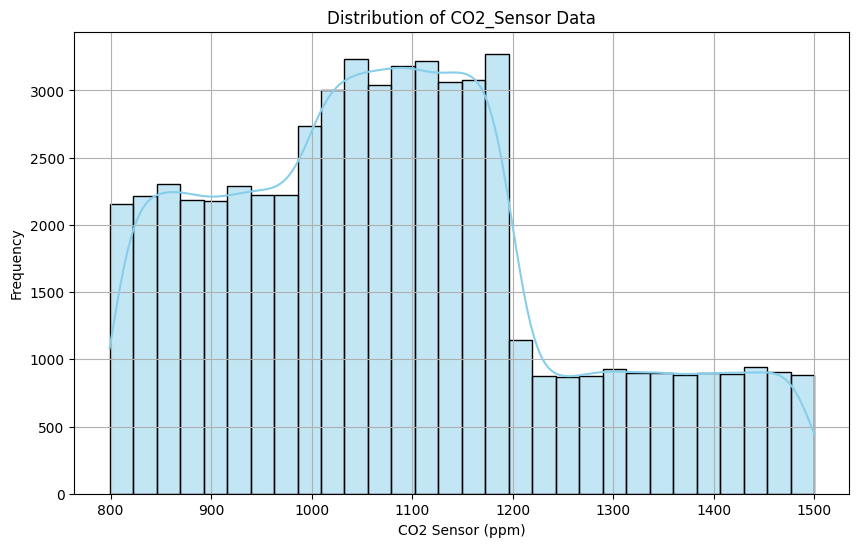

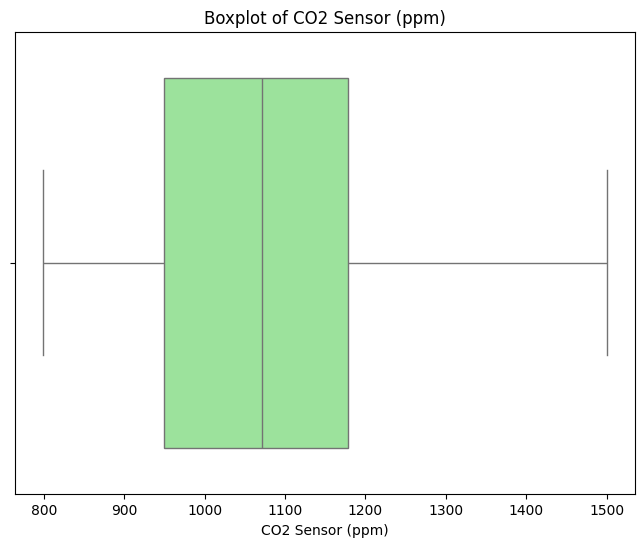

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive statistics
print("Descriptive Statistics for CO2:")
print(df['CO2 Sensor (ppm)'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Sensor (ppm)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of CO2_Sensor Data')
plt.xlabel('CO2 Sensor (ppm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CO2 Sensor (ppm)'], color='lightgreen')
plt.title('Boxplot of CO2 Sensor (ppm)')
plt.xlabel('CO2 Sensor (ppm)')
plt.show()

no missing values in the CO2 data

The histogram seems to show 3 levels for CO2, 800 to 1000, 1000 to 1200, 1200 to 1500

The CO2 levels might be actively regulated within specific ranges depending on some operational conditions or plant needs

Values range from 801 ppm to 1,498 ppm, seems reasonable for controlled environments

next is EC Sensor

In [7]:

# Group data by 'Plant_Stage' and do descriptive statistics for CO2 levels
co2_by_stage = df.groupby('Plant Stage')['CO2 Sensor (ppm)'].describe()

# Display the summarized data
print(co2_by_stage)


               count         mean         std    min     25%     50%     75%  \
Plant Stage                                                                    
Maturity     19002.0  1124.499632  180.200931  799.0  1000.0  1110.0  1248.0   
Seedling     19425.0  1000.676242  115.492816  799.0   901.0  1001.0  1100.0   
Vegetative   19062.0  1126.658168  182.554413  799.0   999.0  1112.0  1257.0   

                max  
Plant Stage          
Maturity     1500.0  
Seedling     1200.0  
Vegetative   1500.0  


Higher CO2 Uptake During Early Growth:

Plants in high growth stages, like the seedling stage, may have rapid photosynthesis and consume CO2 at a faster rate, resulting in lower CO2 levels

Summary Statistics:
count    57489.000000
mean         1.624435
std          0.415535
min         -0.250000
25%          1.360000
50%          1.650000
75%          1.900000
max          3.440000
Name: EC Sensor (dS/m), dtype: float64


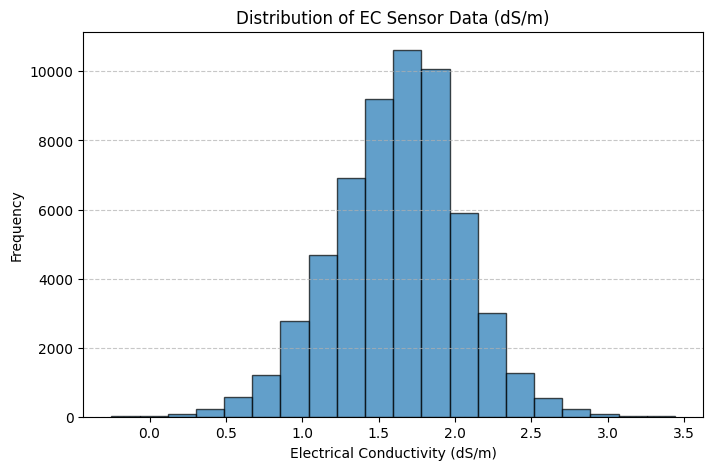

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = df['EC Sensor (dS/m)'].describe()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Plotting the data distribution
plt.figure(figsize=(8, 5))
plt.hist(df['EC Sensor (dS/m)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of EC Sensor Data (dS/m)')
plt.xlabel('Electrical Conductivity (dS/m)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



EC values typically measure dissolved salts in water and are expected to be non-negative

EC sensor data can potentially be used as a feature to predict the type of crops being cultivated. This is because different crops have specific ranges of optimal electrical conductivity (EC) that correlate with their nutrient requirements

Most of the values fall between 1.0 and 2.5 dS/m, which is typical EC ranges for nutrient solutions in many crop systems.

 leafy greens like lettuce may require lower EC values (0.8–1.2 dS/m), while fruiting crops like tomatoes may tolerate higher ranges.

In [9]:
# Replace Negative Values with Zero because cannot have negative values for EC
df['EC Sensor (dS/m)'] = df['EC Sensor (dS/m)'].apply(lambda x: max(x, 0))

# Step 2: Summarize Cleaned Data
cleaned_summary_stats = df['EC Sensor (dS/m)'].describe()

# Display summary statistics
print("cleaned summary  Statistics:")
print(cleaned_summary_stats)

cleaned summary  Statistics:
count    57489.000000
mean         1.624463
std          0.415416
min          0.000000
25%          1.360000
50%          1.650000
75%          1.900000
max          3.440000
Name: EC Sensor (dS/m), dtype: float64


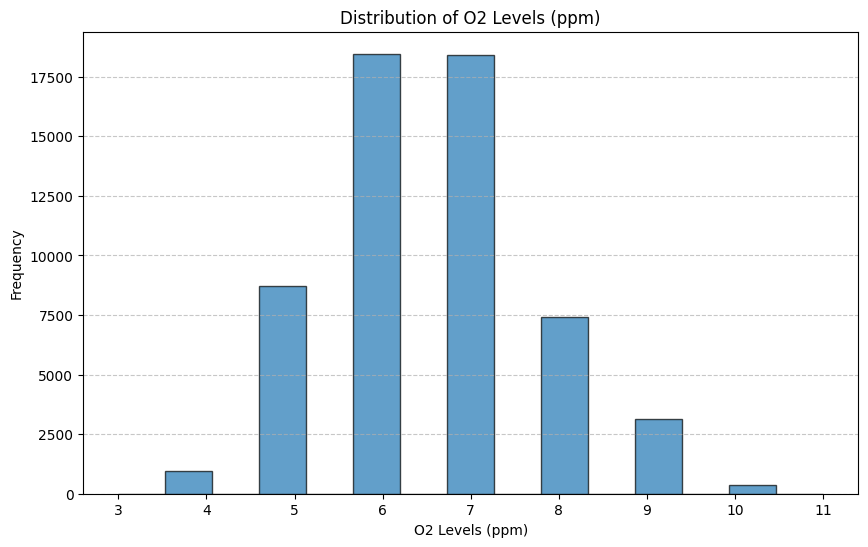

O2 Data Summary:
count    57489.000000
mean         6.580842
std          1.145534
min          3.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         11.000000
Name: O2 Sensor (ppm), dtype: float64

Missing Values in O2 Data: 0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot a histogram of the O2 levels
plt.figure(figsize=(10, 6))
plt.hist(df["O2 Sensor (ppm)"], bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of O2 Levels (ppm)')
plt.xlabel('O2 Levels (ppm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Perform basic analysis on O2 data
O2_summary = df["O2 Sensor (ppm)"].describe()
O2_missing = df["O2 Sensor (ppm)"].isnull().sum()

# Print the results
print("O2 Data Summary:")
print(O2_summary)
print("\nMissing Values in O2 Data:", O2_missing)


Completeness: No missing values in the O2 data.
Range: O2 levels range from 4 to 10 ppm, which seem reasonable for controlled environments.

Descriptive Statistics for pH_Sensor:
count    57489.000000
mean         6.021446
std          0.400251
min          3.800000
25%          5.800000
50%          6.000000
75%          6.300000
max          7.800000
Name: pH Sensor, dtype: float64


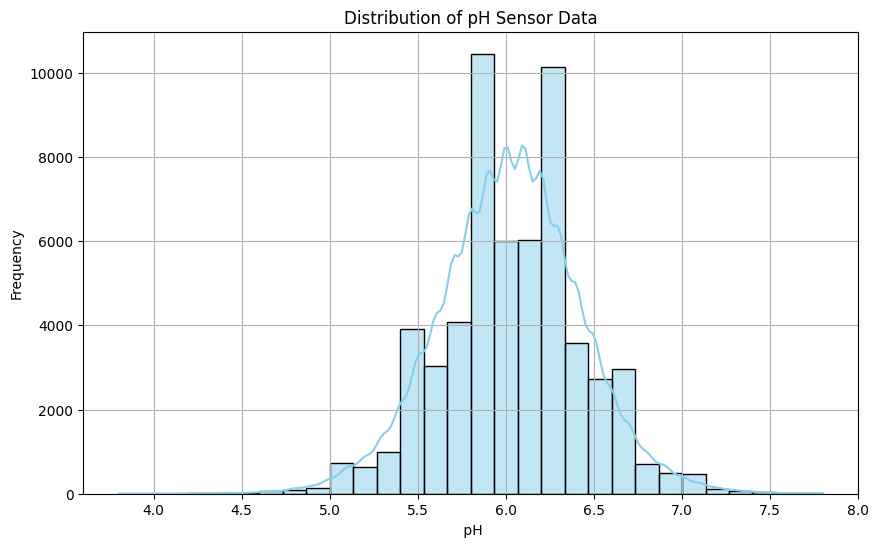

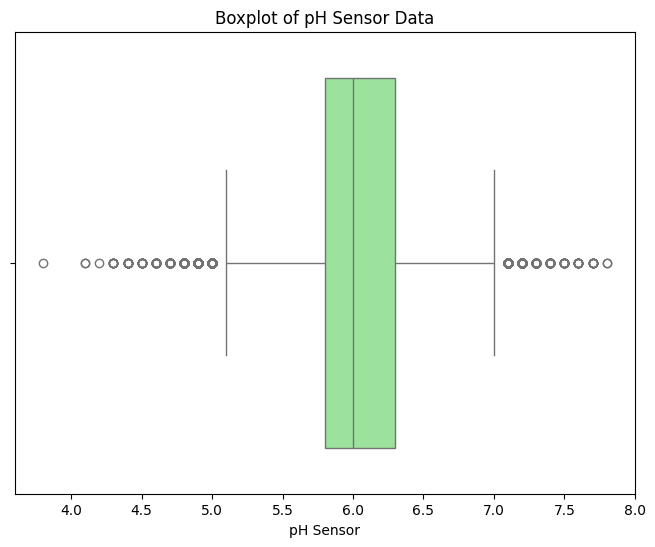

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics pH Sensor
print("Descriptive Statistics for pH_Sensor:")
print(df['pH Sensor'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['pH Sensor'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of pH Sensor Data')
plt.xlabel(' pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['pH Sensor'], color='lightgreen')
plt.title('Boxplot of pH Sensor Data')
plt.xlabel('pH Sensor')
plt.show()

Count: 57,489 entries (no missing values).
Mean: 6.02, indicating the average pH is slightly acidic.
Standard Deviation: 0.40, showing low variability.
Range: Minimum of 3.8 and maximum of 7.8.

pH seems good


next clean the lux column

Descriptive Statistics for Light_Intensity_Sensor_lux:
count    53211.000000
mean       397.841668
std        222.923860
min       -799.000000
25%        257.000000
50%        403.000000
75%        553.000000
max        800.000000
Name: Light Intensity Sensor (lux), dtype: float64


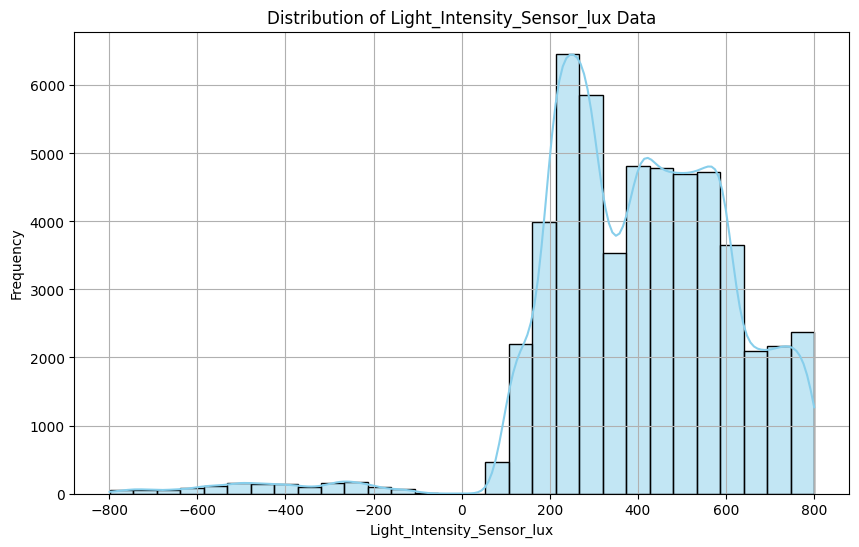

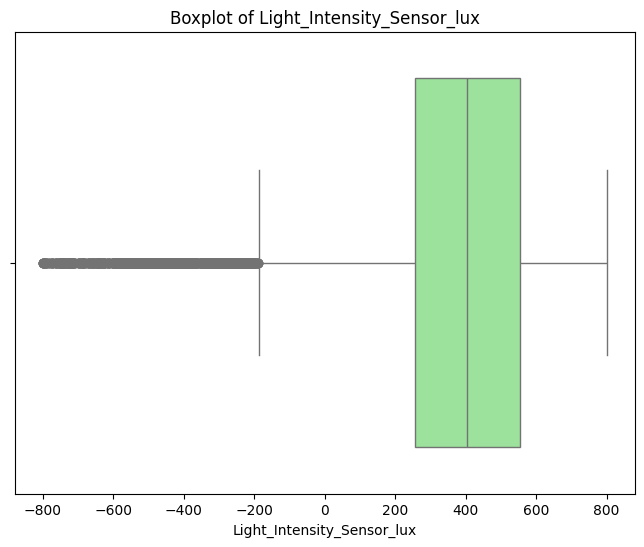

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Descriptive statistics
print("Descriptive Statistics for Light_Intensity_Sensor_lux:")
print(df['Light Intensity Sensor (lux)'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Light Intensity Sensor (lux)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Light_Intensity_Sensor_lux Data')
plt.xlabel('Light_Intensity_Sensor_lux')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Light Intensity Sensor (lux)'], color='lightgreen')
plt.title('Boxplot of Light_Intensity_Sensor_lux')
plt.xlabel('Light_Intensity_Sensor_lux')
plt.show()

negative value for light is not possible

since the negative values also range to -800, assumed that the values are inversed. therefore take the absolute values instead


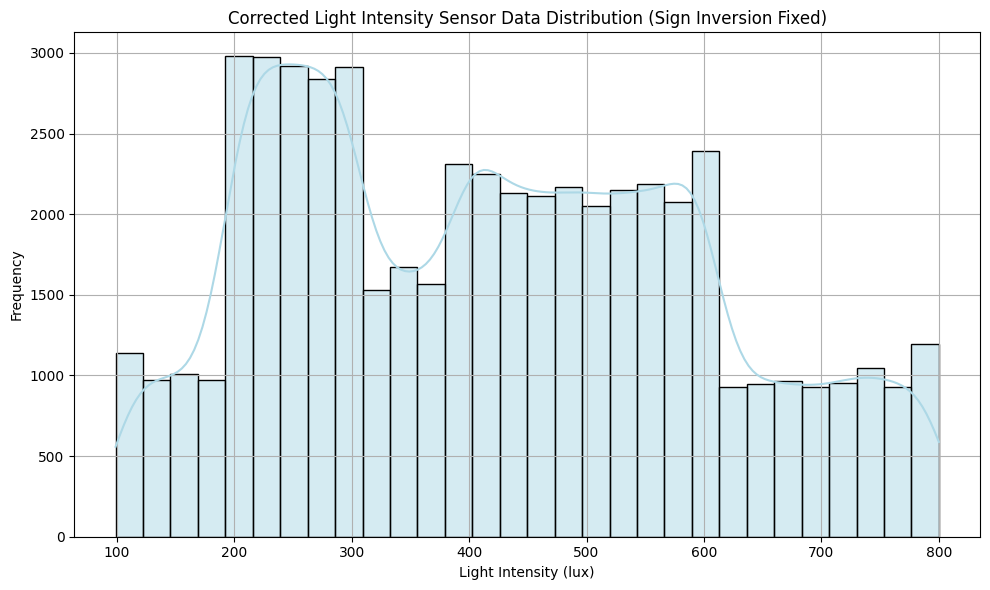

(count    1385.000000
 mean      419.154513
 std       172.310000
 min       105.000000
 25%       269.000000
 50%       417.000000
 75%       542.000000
 max       799.000000
 Name: Light Intensity Sensor (lux), dtype: float64,
 count    51826.000000
 mean       419.675105
 std        178.648648
 min         99.000000
 25%        265.000000
 50%        411.000000
 75%        557.000000
 max        800.000000
 Name: Light Intensity Sensor (lux), dtype: float64)

In [17]:
# df['Light Intensity Sensor (lux)']

# Step 1: Extract absolute values of negative readings
neg_values = df['Light Intensity Sensor (lux)'][df['Light Intensity Sensor (lux)'] < 0]
abs_neg_values = neg_values.abs()

# Step 2: Compare absolute negative values with valid positive values
pos_values = df['Light Intensity Sensor (lux)'][df['Light Intensity Sensor (lux)'] >= 0]

# Descriptive statistics for comparison
neg_stats = abs_neg_values.describe()
pos_stats = pos_values.describe()

# Step 3: Replace negative values with their absolute values (sign inversion correction)
df['Light Intensity Sensor (lux)'] = df['Light Intensity Sensor (lux)'].apply(
    lambda x: abs(x) if x < 0 else x
)

# Step 4: Visualization for comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Light Intensity Sensor (lux)'], bins=30, kde=True, color='lightblue')
plt.title('Corrected Light Intensity Sensor Data Distribution (Sign Inversion Fixed)')
plt.xlabel('Light Intensity (lux)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

neg_stats, pos_stats


after comparison, the statistics of the negative and positive values looks very similar.

sign inversion for the negative values are executed

In [19]:
print(df['Light Intensity Sensor (lux)'].describe())

missing_data = df['Light Intensity Sensor (lux)'].isnull().sum()

print("Missing Light Intensity Sensor (lux):")
print(missing_data)

count    53211.000000
mean       419.661555
std        178.484969
min         99.000000
25%        265.000000
50%        411.000000
75%        556.000000
max        800.000000
Name: Light Intensity Sensor (lux), dtype: float64
Light Intensity Sensor (lux):
4278


In [20]:
# Remove rows with missing data in the "Light Intensity Sensor (lux)" column
df.dropna(subset=['Light Intensity Sensor (lux)'], inplace=True)

print(df['Light Intensity Sensor (lux)'].describe())

missing_data = df['Light Intensity Sensor (lux)'].isnull().sum()

print("Missing Light Intensity Sensor (lux):")
print(missing_data)

count    53211.000000
mean       419.661555
std        178.484969
min         99.000000
25%        265.000000
50%        411.000000
75%        556.000000
max        800.000000
Name: Light Intensity Sensor (lux), dtype: float64
Missing Light Intensity Sensor (lux):
0


light is assumed to be critical data

currently, did not want to use imputation to preserve these 4278 rows of data

since less than 10% outright delete

In [21]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Display the missing data summary
print("Missing data summary:")
print(missing_data)

Missing data summary:
System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8056
Humidity Sensor (%)             36000
Light Intensity Sensor (lux)        0
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9208
Nutrient P Sensor (ppm)          5276
Nutrient K Sensor (ppm)          3415
pH Sensor                           0
Water Level Sensor (mm)          7985
dtype: int64


next is water

Descriptive Statistics for water_Sensor:
count    45226.000000
mean        25.710947
std          5.812937
min         10.001955
25%         21.322871
50%         26.000000
75%         30.000000
max         39.998717
Name: Water Level Sensor (mm), dtype: float64


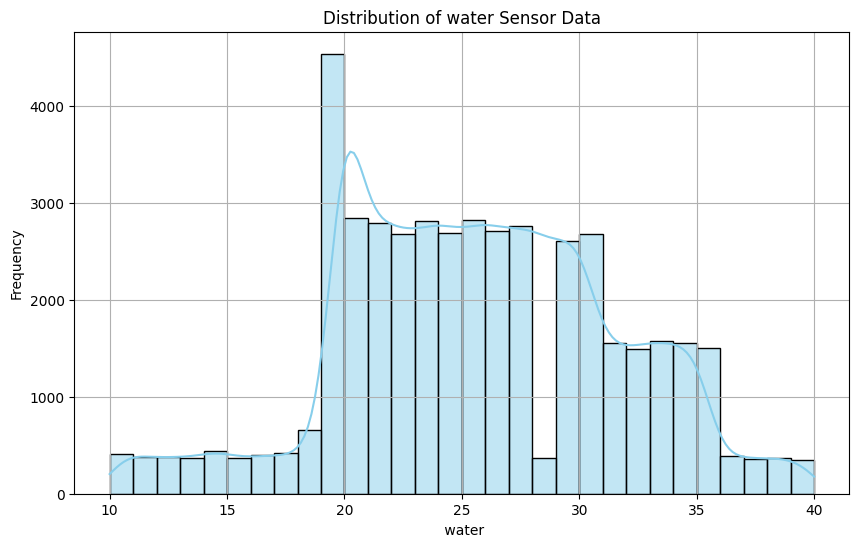

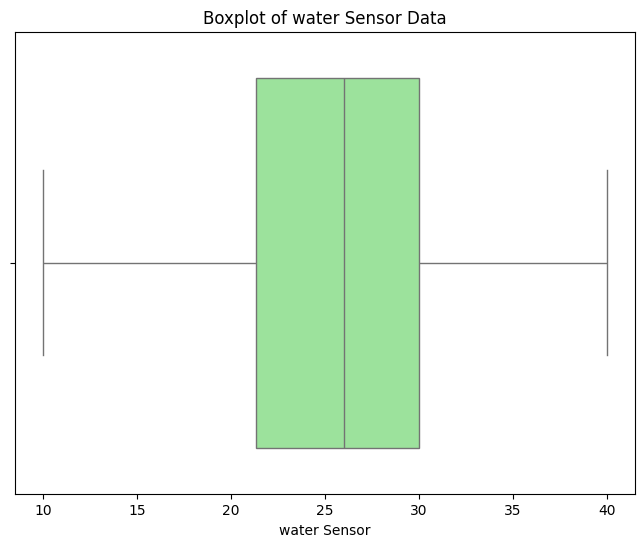

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(df['Water Level Sensor (mm)'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Water Level Sensor (mm)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of water Sensor Data')
plt.xlabel(' water')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Water Level Sensor (mm)'], color='lightgreen')
plt.title('Boxplot of water Sensor Data')
plt.xlabel('water Sensor')
plt.show()

In [23]:
# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(df['Water Level Sensor (mm)'].describe())

missing_data = df['Water Level Sensor (mm)'].isnull().sum()

print("'Water Level Sensor (mm)':")
print(missing_data)

Descriptive Statistics for water_Sensor:
count    45226.000000
mean        25.710947
std          5.812937
min         10.001955
25%         21.322871
50%         26.000000
75%         30.000000
max         39.998717
Name: Water Level Sensor (mm), dtype: float64
'Water Level Sensor (mm)':
7985


In [34]:
# Make a copy of the original data before cleaning
data_cleaned = df.copy()

from sklearn.impute import KNNImputer
import numpy as np

# Use KNN imputer to replace missing values for 'Water Level Sensor (mm)'
imputer = KNNImputer(n_neighbors=3)
data_cleaned[['Water Level Sensor (mm)']] = imputer.fit_transform(data_cleaned[['Water Level Sensor (mm)']])

# Show imputation results for verification
imputed_values = data_cleaned.loc[df['Water Level Sensor (mm)'].isnull(), 'Water Level Sensor (mm)']
print("Imputed Values:")
print(imputed_values)

# Handle outliers using IQR (Interquartile Range)
Q1 = data_cleaned['Water Level Sensor (mm)'].quantile(0.25)
Q3 = data_cleaned['Water Level Sensor (mm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data_cleaned[(data_cleaned['Water Level Sensor (mm)'] >= lower_bound) & (data_cleaned['Water Level Sensor (mm)'] <= upper_bound)]

# Display the first few rows to verify changes
# data_cleaned.head()



Imputed Values:
3        25.710947
39       25.710947
40       25.710947
41       25.710947
46       25.710947
           ...    
57466    25.710947
57469    25.710947
57480    25.710947
57484    25.710947
57485    25.710947
Name: Water Level Sensor (mm), Length: 7985, dtype: float64


In [35]:
# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(data_cleaned['Water Level Sensor (mm)'].describe())

missing_data = data_cleaned['Water Level Sensor (mm)'].isnull().sum()

print("'Water Level Sensor (mm)':")
print(missing_data)

Descriptive Statistics for water_Sensor:
count    52425.000000
mean        25.836241
std          5.086168
min         11.500441
25%         22.000000
50%         25.710947
75%         29.000000
max         39.497704
Name: Water Level Sensor (mm), dtype: float64
'Water Level Sensor (mm)':
0


Descriptive Statistics for water_Sensor:
count    52425.000000
mean        25.836241
std          5.086168
min         11.500441
25%         22.000000
50%         25.710947
75%         29.000000
max         39.497704
Name: Water Level Sensor (mm), dtype: float64


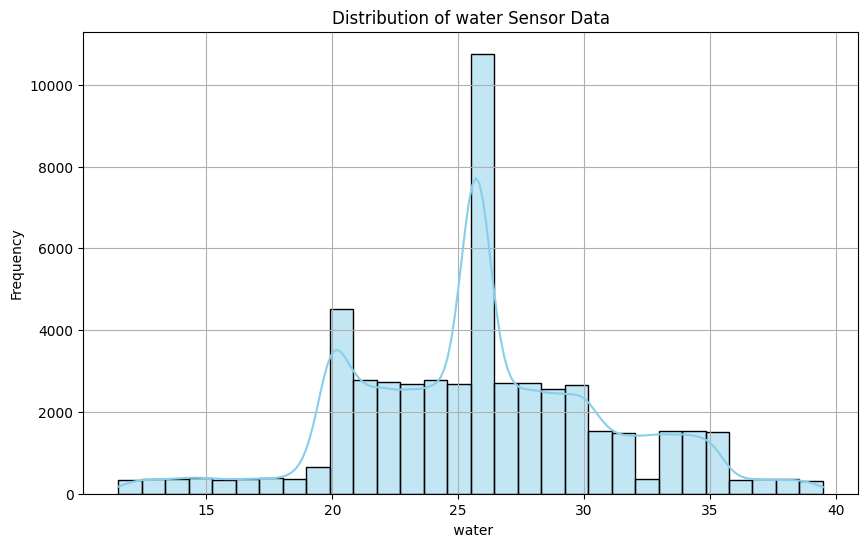

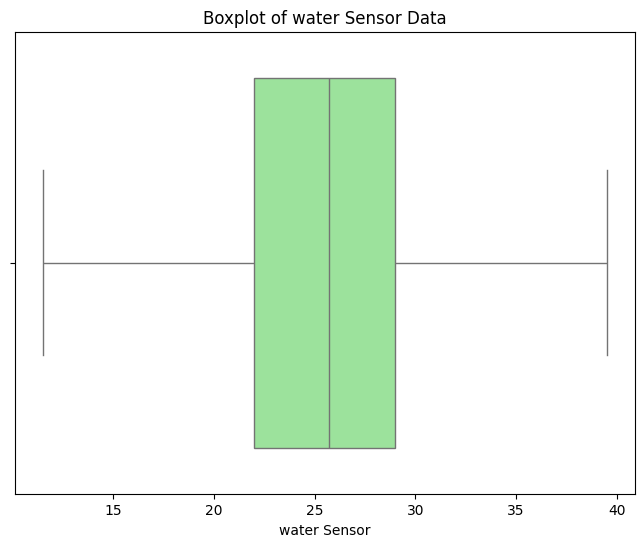

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(data_cleaned['Water Level Sensor (mm)'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Water Level Sensor (mm)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of water Sensor Data')
plt.xlabel(' water')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['Water Level Sensor (mm)'], color='lightgreen')
plt.title('Boxplot of water Sensor Data')
plt.xlabel('water Sensor')
plt.show()

In [44]:
# Make a copy of the original data before cleaning
data_backup = df.copy()

from sklearn.impute import KNNImputer
import numpy as np

# Use KNN imputer to replace missing values for 'Water Level Sensor (mm)' inplace
imputer = KNNImputer(n_neighbors=5)
df[['Water Level Sensor (mm)']] = imputer.fit_transform(df[['Water Level Sensor (mm)']])




In [45]:
# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(df['Water Level Sensor (mm)'].describe())

missing_data = df['Water Level Sensor (mm)'].isnull().sum()

print("'Water Level Sensor (mm)':")
print(missing_data)

Descriptive Statistics for water_Sensor:
count    53211.000000
mean        25.710947
std          5.359056
min         10.001955
25%         22.000000
50%         25.710947
75%         29.000000
max         39.998717
Name: Water Level Sensor (mm), dtype: float64
'Water Level Sensor (mm)':
0


Descriptive Statistics for water_Sensor:
count    53211.000000
mean        25.710947
std          5.359056
min         10.001955
25%         22.000000
50%         25.710947
75%         29.000000
max         39.998717
Name: Water Level Sensor (mm), dtype: float64


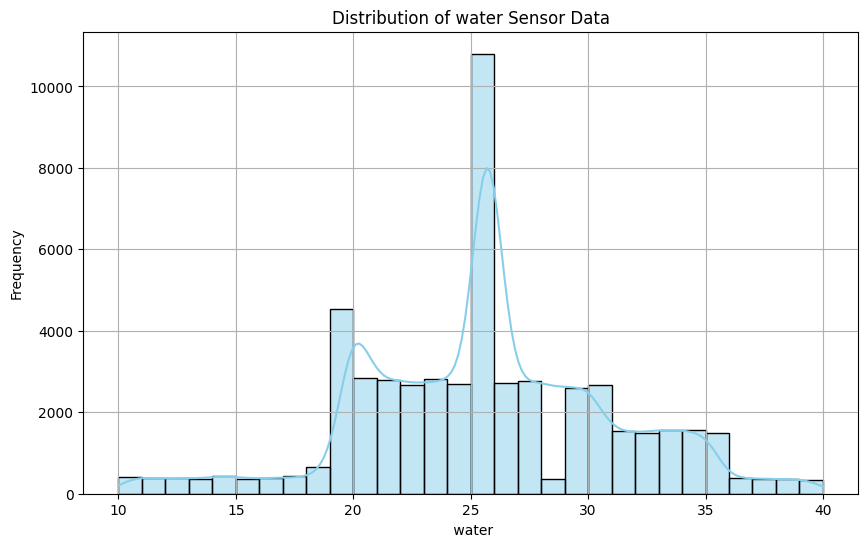

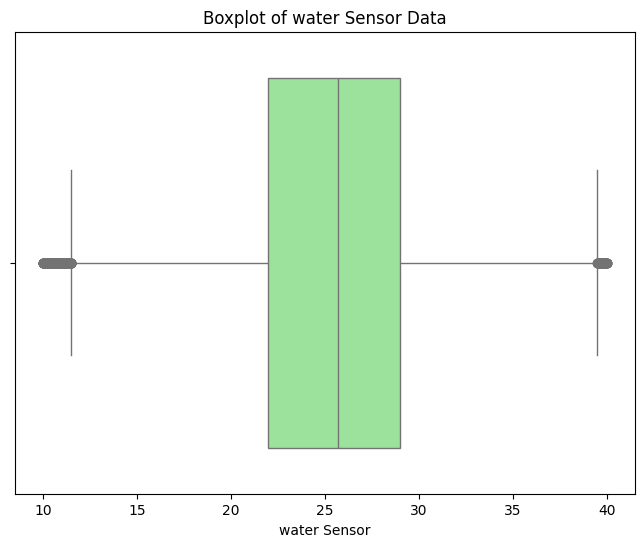

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics for water_Sensor:")
print(df['Water Level Sensor (mm)'].describe())

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Water Level Sensor (mm)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of water Sensor Data')
plt.xlabel(' water')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Water Level Sensor (mm)'], color='lightgreen')
plt.title('Boxplot of water Sensor Data')
plt.xlabel('water Sensor')
plt.show()

In [50]:
print(df.describe)

# Check for missing values in each column
missing_data = df.isnull().sum()

# Display the missing data summary
print("Missing data summary:")
print(missing_data)

<bound method NDFrame.describe of       System Location Code Previous Cycle Plant Type           Plant Type  \
0                   Zone_D                     Herbs           Vine Crops   
1                   Zone_G                     Herbs           Vine Crops   
2                   Zone_F                     Herbs                Herbs   
3                   Zone_G                     Herbs  Fruiting Vegetables   
4                   Zone_B                Vine Crops         Leafy Greens   
...                    ...                       ...                  ...   
57484               Zone_C                Vine Crops  Fruiting Vegetables   
57485               Zone_C                Vine Crops  Fruiting Vegetables   
57486               Zone_E                     Herbs           Vine Crops   
57487               Zone_G       Fruiting Vegetables           Vine Crops   
57488               Zone_F       Fruiting Vegetables         Leafy Greens   

      Plant Stage  Temperature Sensor (°C

In [47]:
# Checking
# Loop through each column and print unique values to examine for any error
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: System Location Code
Unique Values: ['Zone_D' 'Zone_G' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_A' 'Zone_E']
Number of Unique Values: 7

Column: Previous Cycle Plant Type
Unique Values: ['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']
Number of Unique Values: 4

Column: Plant Type
Unique Values: ['Vine Crops' 'Herbs' 'Fruiting Vegetables' 'Leafy Greens']
Number of Unique Values: 4

Column: Plant Stage
Unique Values: ['Maturity' 'Vegetative' 'Seedling']
Number of Unique Values: 3

Column: Temperature Sensor (°C)
Unique Values: [ 23.34 -24.16  23.84 ...  19.   -21.6  -23.24]
Number of Unique Values: 1414

Column: Humidity Sensor (%)
Unique Values: [  nan 63.14 62.27 ... 72.27 59.33 80.09]
Number of Unique Values: 2092

Column: Light Intensity Sensor (lux)
Unique Values: [454. 441. 562. 651. 144. 675. 514. 317. 435. 444. 736. 179. 531. 664.
 723. 100. 293. 378. 622. 477. 509. 219. 294. 205. 387. 769. 400. 337.
 305. 226. 738. 105. 600. 407. 437. 763. 779. 597. 486. 233. 598. 33